<a href="https://colab.research.google.com/github/suhas-arun/Neural-Networks/blob/master/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
EPOCHS = 50

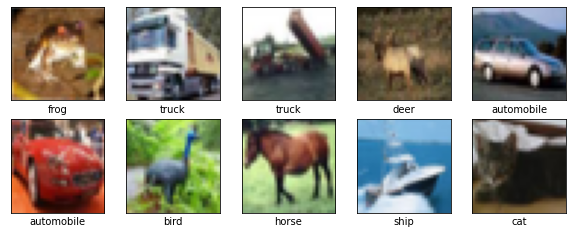

In [4]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

In [0]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2), strides=2),

    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    
    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),

    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5184 - accuracy: 0.4442 - val_loss: 1.1874 - val_accuracy: 0.5754
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0683 - accuracy: 0.6193 - val_loss: 0.9983 - val_accuracy: 0.6504
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8687 - accuracy: 0.6924 - val_loss: 0.9634 - val_accuracy: 0.6663
Epoch 4/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7349 - accuracy: 0.7390 - val_loss: 0.9003 - val_accuracy: 0.6861
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6339 - accuracy: 0.7771 - val_loss: 0.8723 - val_accuracy: 0.7033
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5508 - accuracy: 0.8038 - val_loss: 0.8175 - val_accuracy: 0.7281
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4642 - accuracy: 0.8338 - val_loss: 0.8359 - val_accuracy:

In [0]:
dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [0]:
dropout_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
dropout_history = dropout_model.fit(train_images, train_labels, epochs=EPOCHS, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6722 - accuracy: 0.3771 - val_loss: 1.3290 - val_accuracy: 0.5182
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2752 - accuracy: 0.5406 - val_loss: 1.0531 - val_accuracy: 0.6217
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1060 - accuracy: 0.6066 - val_loss: 0.9387 - val_accuracy: 0.6656
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0069 - accuracy: 0.6413 - val_loss: 0.8970 - val_accuracy: 0.6853
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9461 - accuracy: 0.6676 - val_loss: 0.8495 - val_accuracy: 0.7028
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8880 - accuracy: 0.6868 - val_loss: 0.8014 - val_accuracy: 0.7190
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8510 - accuracy: 0.7001 - val_loss: 0.7839 - val_accuracy:

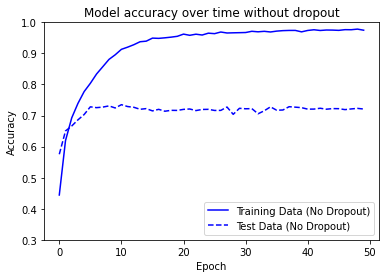

In [12]:
plt.plot(history.history["accuracy"], color="blue")
plt.plot(history.history["val_accuracy"], color="blue", linestyle="dashed")
plt.legend(["Training Data (No Dropout)", "Test Data (No Dropout)"], loc="lower right")
plt.title("Model accuracy over time without dropout")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.3, 1])
plt.show()

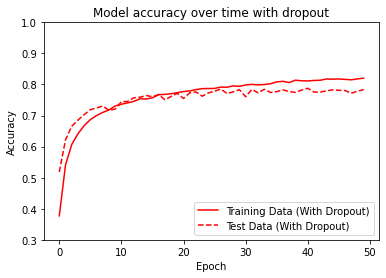

In [13]:
plt.plot(dropout_history.history["accuracy"], color="red")
plt.plot(dropout_history.history["val_accuracy"], color="red", linestyle="dashed")
plt.legend(["Training Data (With Dropout)", "Test Data (With Dropout)"], loc="lower right")
plt.title("Model accuracy over time with dropout")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0.3, 1])
plt.show()